# Main Analysis - Experimental Group

Analyzes data collected in `3_Data_Collection_Experimental_Group.ipynb`.

Calculates the **Coefficient of Variation (CV)** for each column in dataset, which measures relative variability of data.

Computes the **mean CV** for each length-defining keyword to determine their consistency.

Creates **dot plots** to visualize the mean CV per length-defining keyword.

Generates **violin plots** to examine distribution of response lengths for different templates and length groups.

Performs **Shapiro-Wilk tests** to check the normality of each column in the dataset.

Conducts **Levene's test** to assess equality of variances between groups.

Performs **Kruskal-Wallis tests** and post hoc analysis using Dunn's test to compare means of different groups.

Conducts **Wilcoxon Signed-Rank tests** to determine significant differences between means of response lengths and specified lengths.

Calculates average difference between response lengths and specified lengths.

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # dot plots
import seaborn as sns  # violin plots
from scipy.stats import shapiro, levene, kruskal, wilcoxon
from scikit_posthocs import posthoc_dunn
import itertools  # for pair-wise Levene's tests

In [2]:
df = pd.read_csv("data/preprocessed_experimental_group/responses_words.csv")
df

,cover_1300 characters long,cover_1400 characters long,cover_1500 characters long,cover_210 words long,cover_230 words long,cover_240 tokens long,cover_240 words long,cover_260 tokens long,cover_280 tokens long,cover_average-length,...,social_800 characters long,social_average-length,social_brief,social_concise,social_extensive,social_long,social_medium-length,social_moderate-length,social_short,social_verbose
0,392,326,329,261,257,235,278,229,220,209,...,262,112,79,65,258,206,172,151,88,174
1,369,336,337,225,252,284,254,256,236,223,...,216,140,72,70,183,211,148,141,72,250
2,309,315,413,217,231,276,258,323,213,190,...,308,120,107,62,223,195,143,138,73,222
3,311,353,335,217,230,256,236,239,296,225,...,182,129,93,68,210,190,158,172,74,216
4,388,326,319,221,259,242,218,251,282,219,...,239,118,77,70,199,196,181,160,87,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,359,311,266,218,221,232,275,247,300,226,...,224,94,102,68,234,174,142,151,88,215
96,353,340,372,215,255,256,252,266,232,232,...,249,123,70,99,198,201,133,182,66,227
97,405,294,413,222,251,269,279,247,252,206,...,239,138,62,67,171,235,147,164,87,274
98,305,263,378,208,266,227,231,264,286,178,...,214,114,92,81,181,229,128,144,89,242


In [3]:
print("SHAPE:\n", df.shape, "\n")
print("COLUMNS:\n", list(df.columns))

SHAPE:
 (100, 90) 

COLUMNS:
 ['cover_1300 characters long', 'cover_1400 characters long', 'cover_1500 characters long', 'cover_210 words long', 'cover_230 words long', 'cover_240 tokens long', 'cover_240 words long', 'cover_260 tokens long', 'cover_280 tokens long', 'cover_average-length', 'cover_brief', 'cover_concise', 'cover_extensive', 'cover_long', 'cover_medium-length', 'cover_moderate-length', 'cover_short', 'cover_verbose', 'email_1000 characters long', 'email_1100 characters long', 'email_1300 characters long', 'email_170 words long', 'email_190 words long', 'email_200 tokens long', 'email_220 tokens long', 'email_220 words long', 'email_260 tokens long', 'email_average-length', 'email_brief', 'email_concise', 'email_extensive', 'email_long', 'email_medium-length', 'email_moderate-length', 'email_short', 'email_verbose', 'essay_2300 characters long', 'essay_2500 characters long', 'essay_2700 characters long', 'essay_350 words long', 'essay_370 words long', 'essay_400 tokens l

# Calculate CV for all columns

https://en.wikipedia.org/wiki/Coefficient_of_variation

In [4]:
cv = df.std() / df.mean()
cv = cv.sort_values(ascending=False)
cv

explanation_short              0.268621
explanation_260 tokens long    0.227530
explanation_concise            0.222478
explanation_extensive          0.219692
explanation_verbose            0.213847
                                 ...   
email_220 words long           0.071425
cover_210 words long           0.070170
cover_240 words long           0.068782
cover_230 words long           0.066016
email_190 words long           0.064835
Length: 90, dtype: float64

# Extracting length-defining keywords from column names

In [5]:
# convert column names to list
colnames = list(df.columns)
# split on _, take the second element, create a list of these
length_descriptors = [col.split("_")[1] for col in colnames]
# create a set of these to remove duplicates
length_descriptors = set(length_descriptors)
# convert back to list
length_descriptors = list(length_descriptors)

print(f"LENGTH-DEFINING KEYWORDS:\n{length_descriptors}")

LENGTH-DEFINING KEYWORDS:
['350 words long', 'average-length', 'medium-length', '170 words long', '260 tokens long', 'short', '1100 characters long', '1400 characters long', '240 words long', '280 tokens long', 'moderate-length', '170 tokens long', '600 characters long', '2700 characters long', '210 words long', '1500 characters long', '100 words long', 'extensive', 'verbose', '300 tokens long', '1000 characters long', '400 words long', '220 words long', '120 words long', '700 characters long', '240 tokens long', '430 tokens long', '370 words long', '2500 characters long', '190 words long', '130 tokens long', 'long', '1300 characters long', '400 tokens long', '800 characters long', '150 tokens long', '230 words long', 'concise', '200 tokens long', '110 words long', 'brief', '2300 characters long', '470 tokens long', '220 tokens long']


# Calculating mean CV per each length-defining keyword

In [6]:
def mean_for_descriptor(descriptor):
    """Calculates mean CV of all columns containing a given length-defining keyword"""
    cv_descriptor = cv[cv.index.str.contains(descriptor)]
    return cv_descriptor.mean()

In [7]:
# create DataFrame of mean CVs for each length descriptor
for descriptor in length_descriptors:
    cv_means = pd.DataFrame(
        {
            "mean_cv": [
                mean_for_descriptor(descriptor) for descriptor in length_descriptors
            ]
        },
        index=length_descriptors,
    )

# sort by mean CV
cv_means = cv_means.sort_values(by="mean_cv", ascending=False)
cv_means

,mean_cv
300 tokens long,0.194350
130 tokens long,0.193393
short,0.177846
concise,0.162647
brief,0.161366
extensive,0.151840
medium-length,0.149819
average-length,0.147822
moderate-length,0.146708
verbose,0.145691


# Dot plots

In [8]:
def plot_cv_means(keyword_or_keywords, color):
    """Plots mean CV per length-defining keyword type used within a prompt."""
    plt.figure(figsize=(10, 4))

    if isinstance(keyword_or_keywords, str):
        mask = cv_means.index.str.contains(keyword_or_keywords)
        plt.scatter(
            cv_means.index[mask],
            cv_means["mean_cv"][mask],
            color=color,
            alpha=1,
            label=f'Length defined using number of "{keyword_or_keywords}"',
            marker="o",
            zorder=2,
        )
    elif isinstance(keyword_or_keywords, list):
        mask = cv_means.index.isin(keyword_or_keywords)
        plt.scatter(
            cv_means.index[mask],
            cv_means["mean_cv"][mask],
            color=color,
            alpha=1,
            label=f"Length defined using constant keywords",
            marker="o",
            zorder=2,
        )
    else:
        print("Please enter a string or list of strings as the first argument.")

    plt.scatter(
        cv_means.index[~mask],
        cv_means["mean_cv"][~mask],
        color=color,
        alpha=0.3,
        label="Other",
        marker="o",
        zorder=2,
    )

    plt.title("Mean CV per Length-Defining Keyword Used Within a Prompt")
    plt.xlabel("Length-Defining Keyword")
    plt.ylabel("Mean CV (lower = more consistent)")

    plt.xticks(rotation=90, fontsize=8)
    plt.legend()
    plt.grid(True, zorder=1, alpha=0.5, linestyle="--")  # zorder = 1 to put grid behind
    plt.show()

Using **number of words** as the length-defining keyword produces most consistent results (with lowest variability)

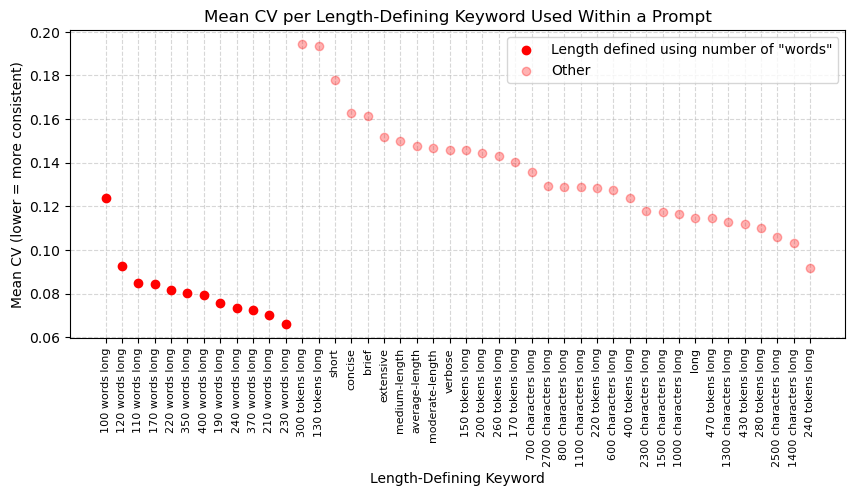

In [9]:
plot_cv_means("words", "red")

Using **number of characters** as the length-defining keyword produces consistent results (with medium variability)

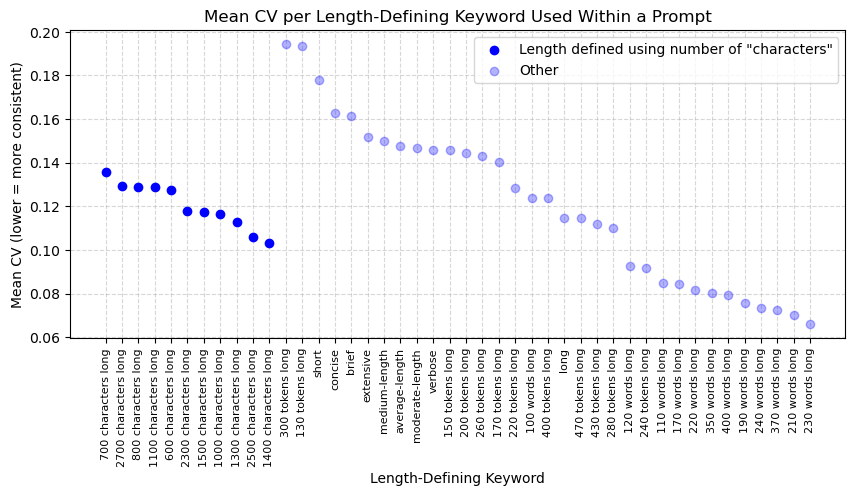

In [10]:
plot_cv_means("characters", "blue")

Using **number of tokens** as the length-defining keyword produces most unreliably long results (with huge range of variability)

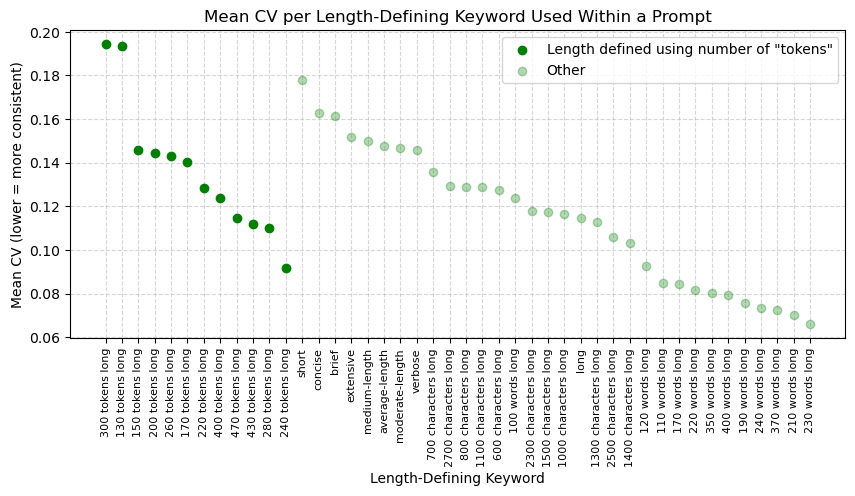

In [11]:
plot_cv_means("tokens", "green")

Using **constant keywords** (words only) as the length-defining keyword produces less consistent results (with higher variability)

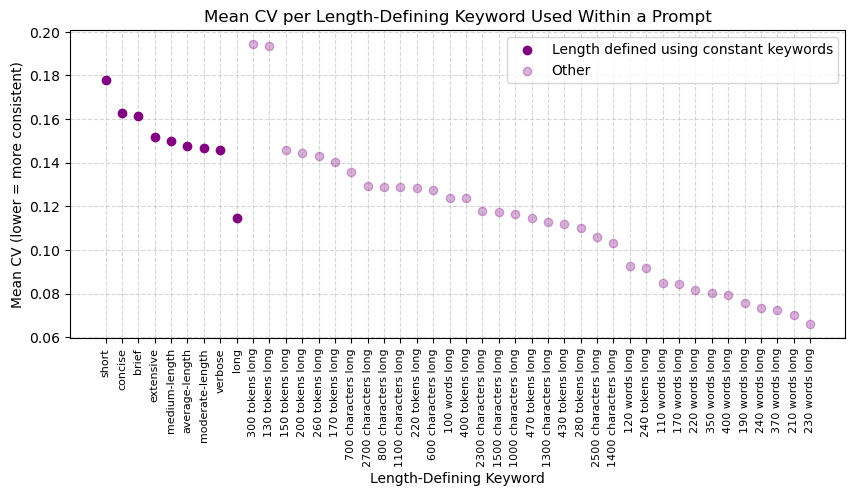

In [12]:
plot_cv_means(
    [
        "short",
        "brief",
        "concise",
        "average-length",
        "medium-length",
        "moderate-length",
        "long",
        "extensive",
        "verbose",
    ],
    "purple",
)

# Violin Plots

In [13]:
def plot_violin(length_type, template, lengths):
    """Plots a violin plot for the given length type, template, and lengths"""

    df = pd.read_csv(
        "data/preprocessed_experimental_group/responses_" + length_type + ".csv"
    )

    # create a dictionary to hold data
    data = {}

    # for each length in lengths, get data from df and add to data
    for length in lengths:
        group = df[template + "_" + length]
        data[" ".join(length.split(" ")[:2])] = pd.Series(group)

    # create a DataFrame from these lists
    data = pd.DataFrame(data)

    # since Seaborn's violinplot prefers "long-form" or "tidy" data, we'll need to melt our DataFrame
    data_melted = data.melt(var_name="group", value_name="response_length")

    if "short" in lengths:
        length_title = "Short"
    elif "medium-length" in lengths:
        length_title = "Medium-Length"
    elif "long" in lengths:
        length_title = "Long"
    else:
        length_title = "Selected"

    # create the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="group", y="response_length", data=data_melted, palette="Set2")
    plt.title(
        template.capitalize() + " Response Lengths for " + length_title + " Group"
    )
    plt.show()

### Email

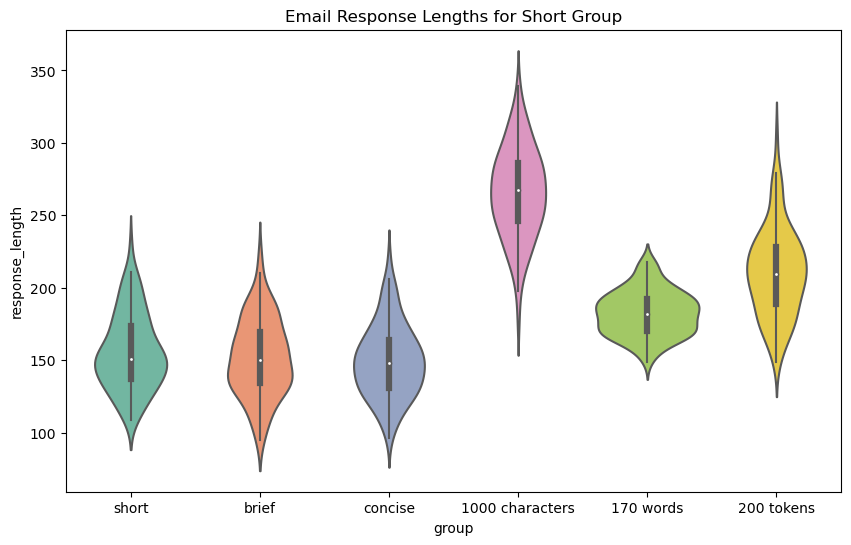

In [14]:
plot_violin(
    "words",
    "email",
    [
        "short",
        "brief",
        "concise",
        "1000 characters long",
        "170 words long",
        "200 tokens long",
    ],
)

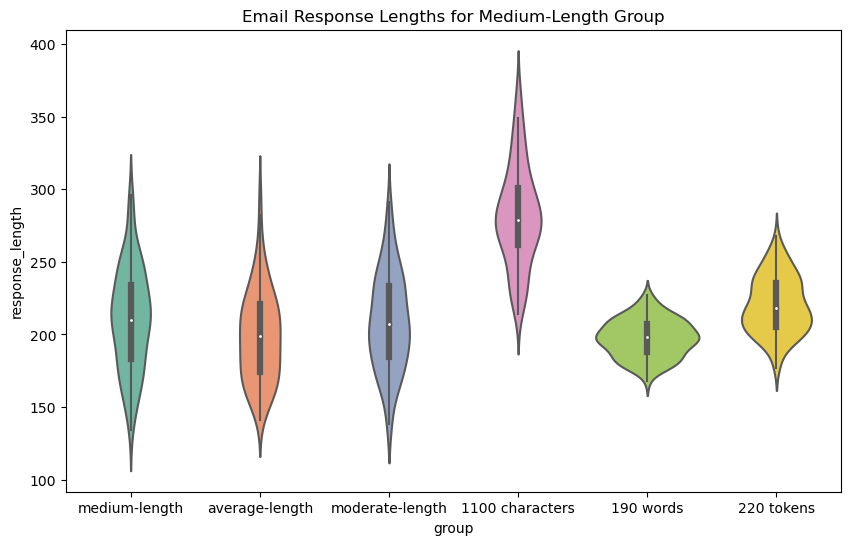

In [15]:
plot_violin(
    "words",
    "email",
    [
        "medium-length",
        "average-length",
        "moderate-length",
        "1100 characters long",
        "190 words long",
        "220 tokens long",
    ],
)

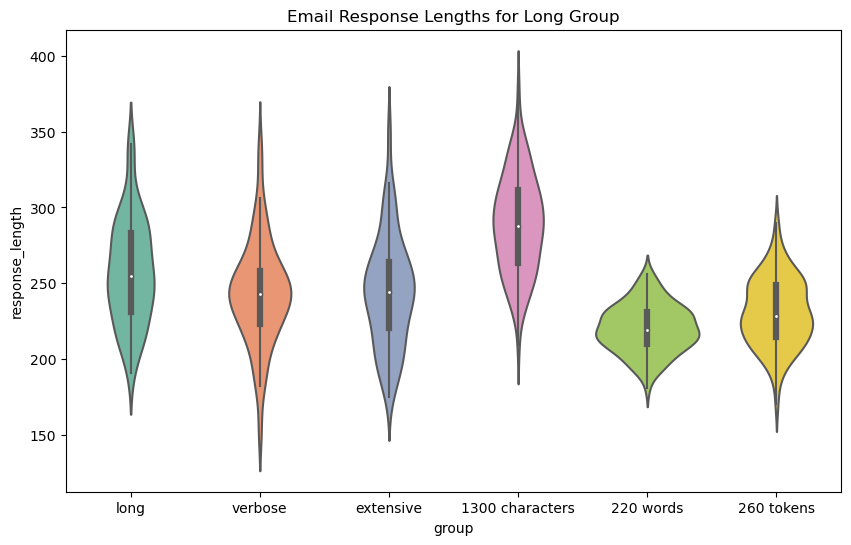

In [16]:
plot_violin(
    "words",
    "email",
    [
        "long",
        "verbose",
        "extensive",
        "1300 characters long",
        "220 words long",
        "260 tokens long",
    ],
)

### Essay

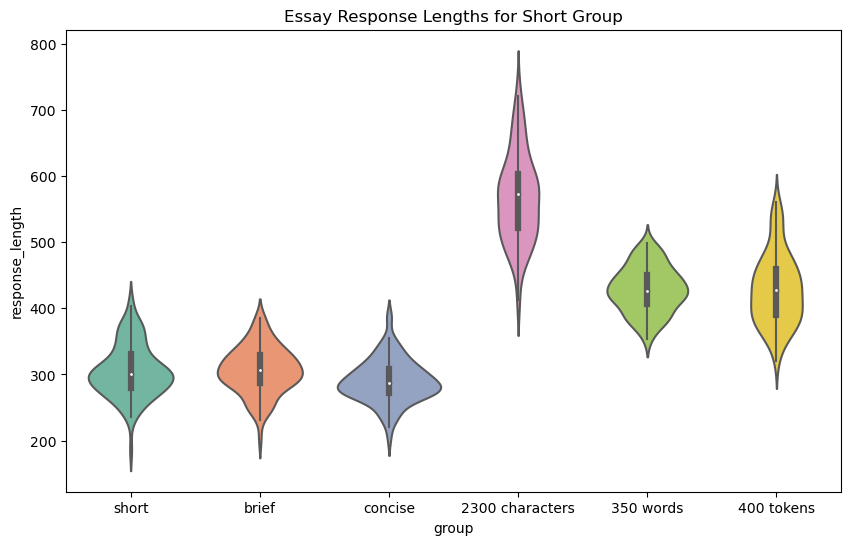

In [17]:
plot_violin(
    "words",
    "essay",
    [
        "short",
        "brief",
        "concise",
        "2300 characters long",
        "350 words long",
        "400 tokens long",
    ],
)

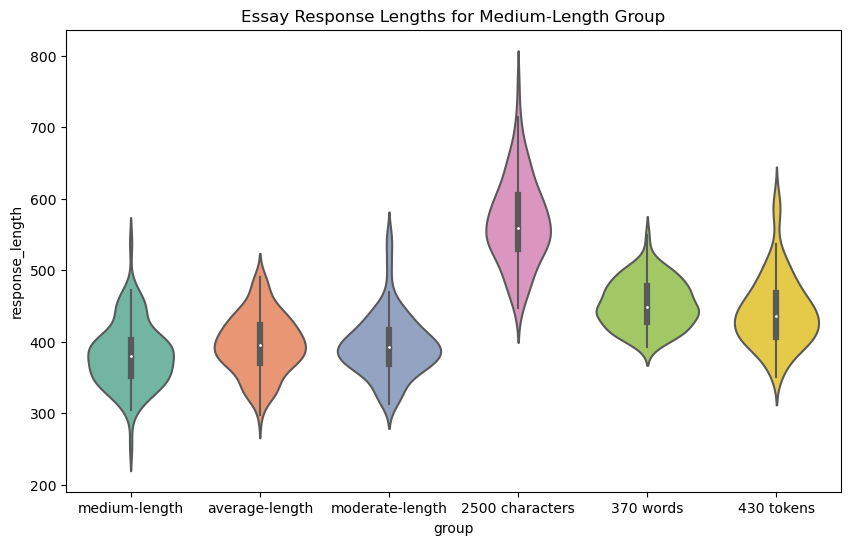

In [18]:
plot_violin(
    "words",
    "essay",
    [
        "medium-length",
        "average-length",
        "moderate-length",
        "2500 characters long",
        "370 words long",
        "430 tokens long",
    ],
)

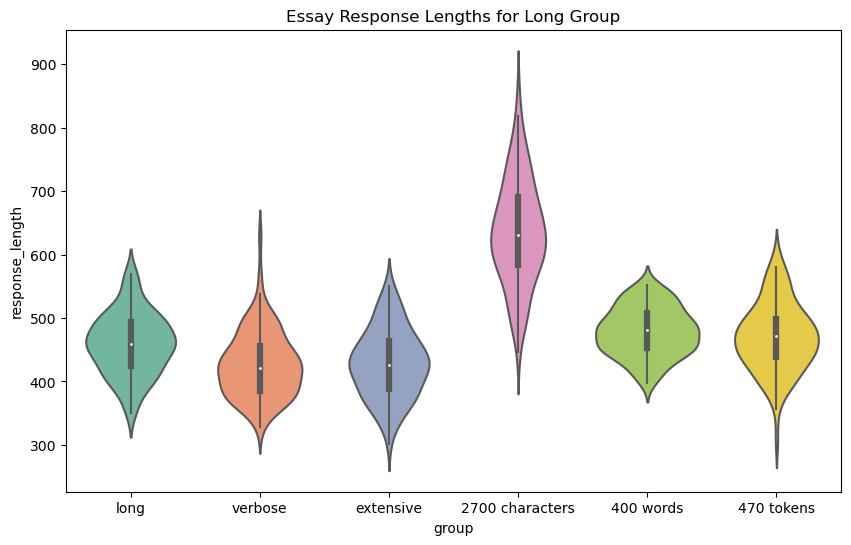

In [19]:
plot_violin(
    "words",
    "essay",
    [
        "long",
        "verbose",
        "extensive",
        "2700 characters long",
        "400 words long",
        "470 tokens long",
    ],
)

### Explanation

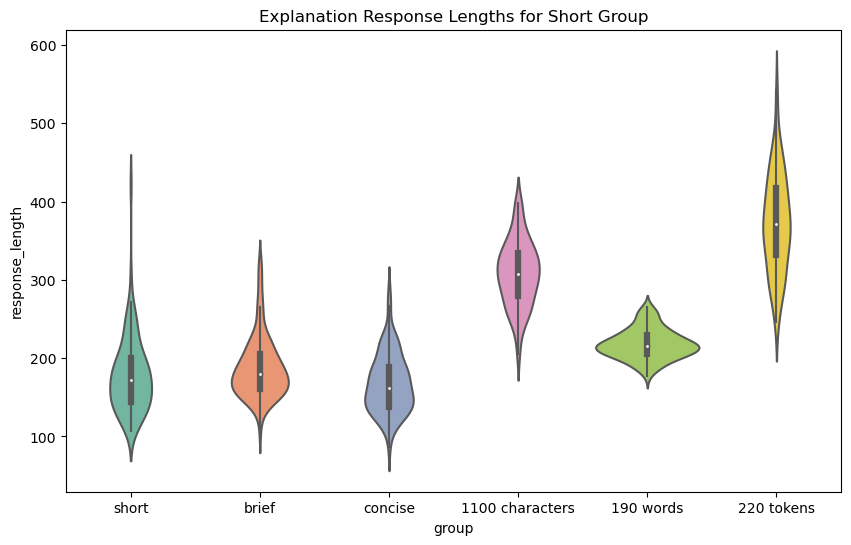

In [20]:
plot_violin(
    "words",
    "explanation",
    [
        "short",
        "brief",
        "concise",
        "1100 characters long",
        "190 words long",
        "220 tokens long",
    ],
)

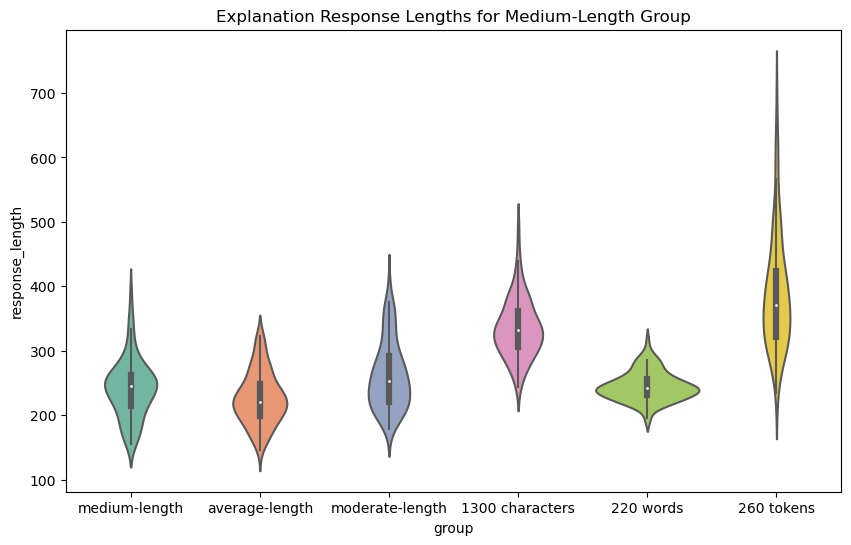

In [21]:
plot_violin(
    "words",
    "explanation",
    [
        "medium-length",
        "average-length",
        "moderate-length",
        "1300 characters long",
        "220 words long",
        "260 tokens long",
    ],
)

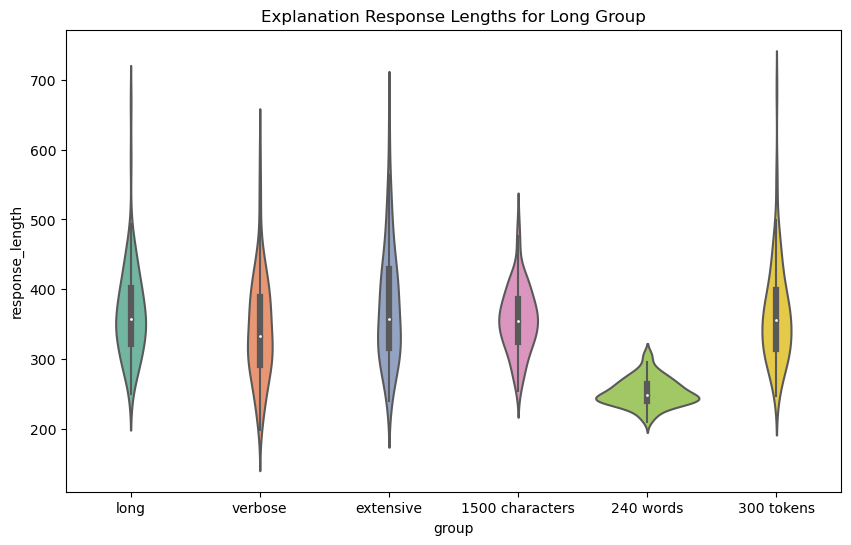

In [22]:
plot_violin(
    "words",
    "explanation",
    [
        "long",
        "verbose",
        "extensive",
        "1500 characters long",
        "240 words long",
        "300 tokens long",
    ],
)

### Cover

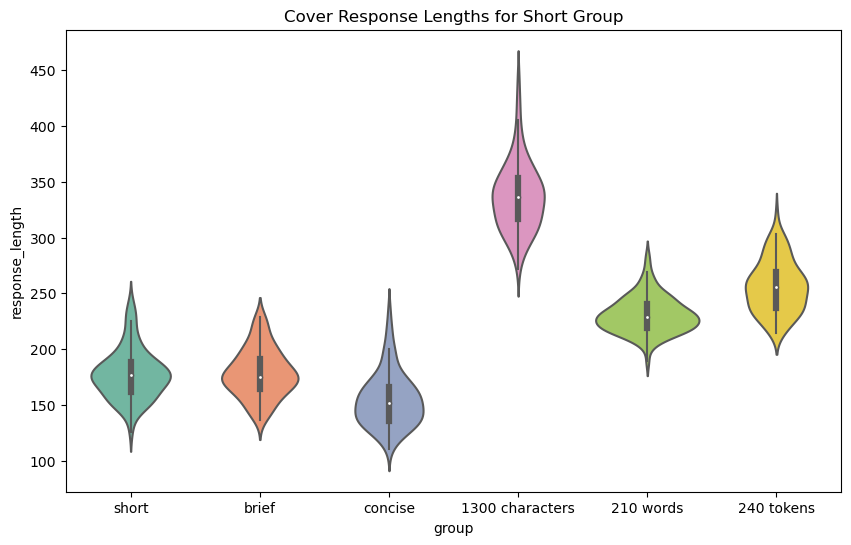

In [23]:
plot_violin(
    "words",
    "cover",
    [
        "short",
        "brief",
        "concise",
        "1300 characters long",
        "210 words long",
        "240 tokens long",
    ],
)

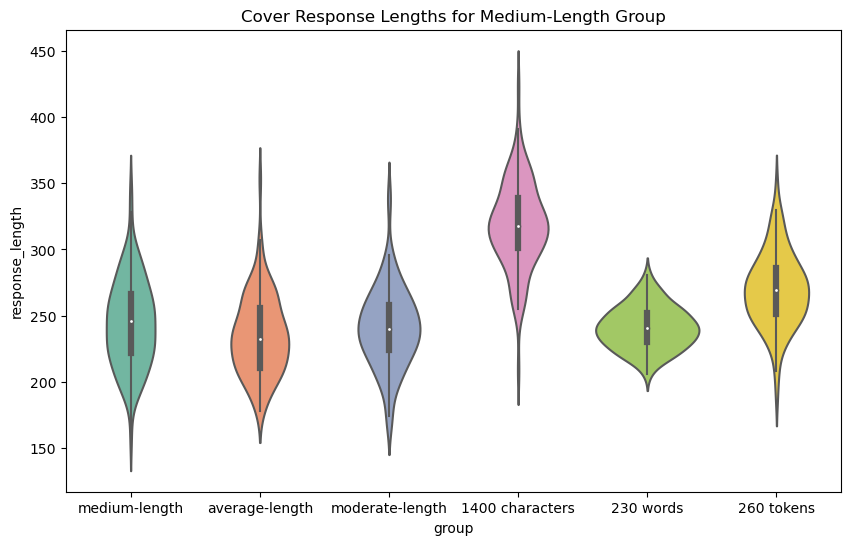

In [24]:
plot_violin(
    "words",
    "cover",
    [
        "medium-length",
        "average-length",
        "moderate-length",
        "1400 characters long",
        "230 words long",
        "260 tokens long",
    ],
)

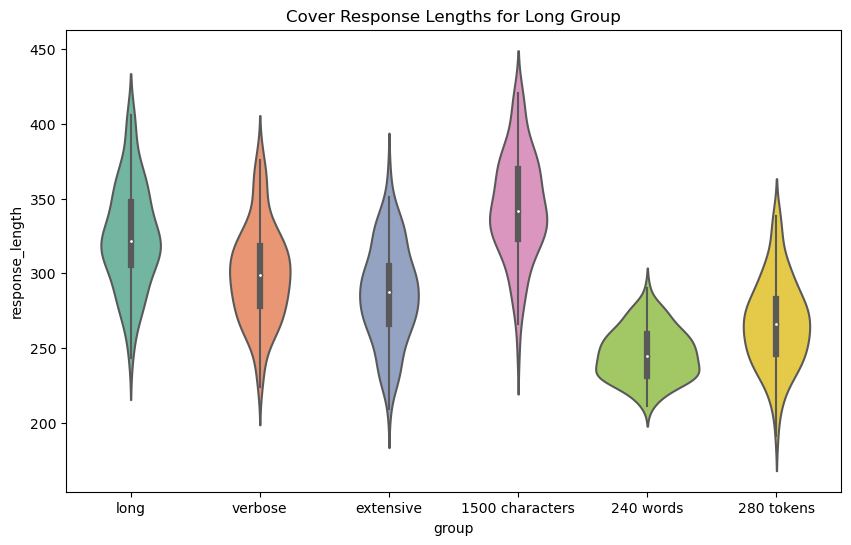

In [25]:
plot_violin(
    "words",
    "cover",
    [
        "long",
        "verbose",
        "extensive",
        "1500 characters long",
        "240 words long",
        "280 tokens long",
    ],
)

### Social

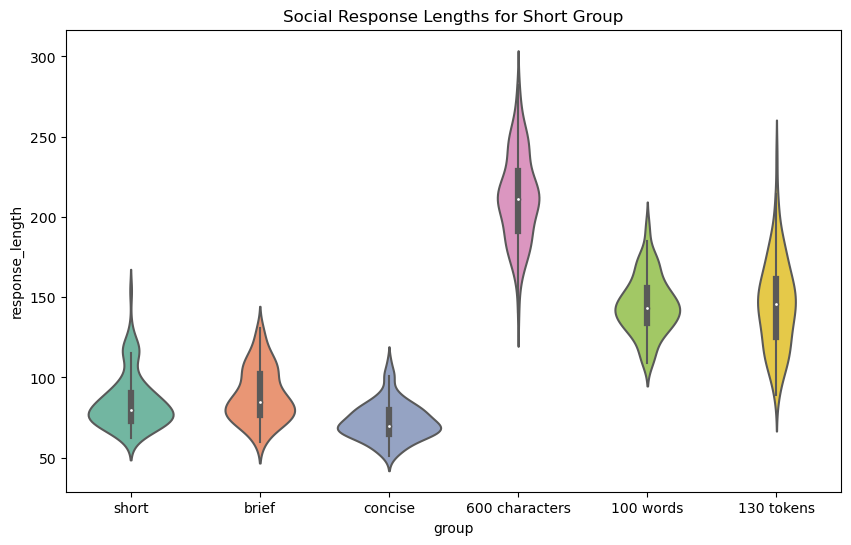

In [26]:
plot_violin(
    "words",
    "social",
    [
        "short",
        "brief",
        "concise",
        "600 characters long",
        "100 words long",
        "130 tokens long",
    ],
)

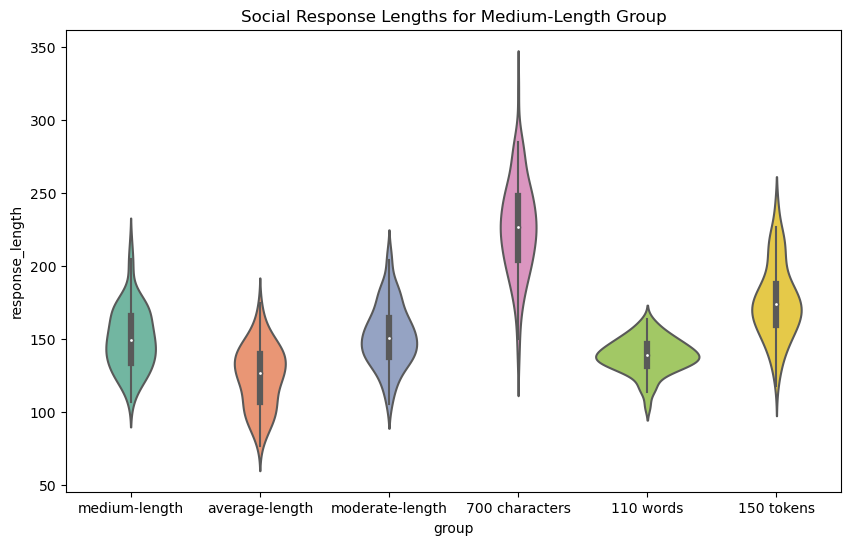

In [27]:
plot_violin(
    "words",
    "social",
    [
        "medium-length",
        "average-length",
        "moderate-length",
        "700 characters long",
        "110 words long",
        "150 tokens long",
    ],
)

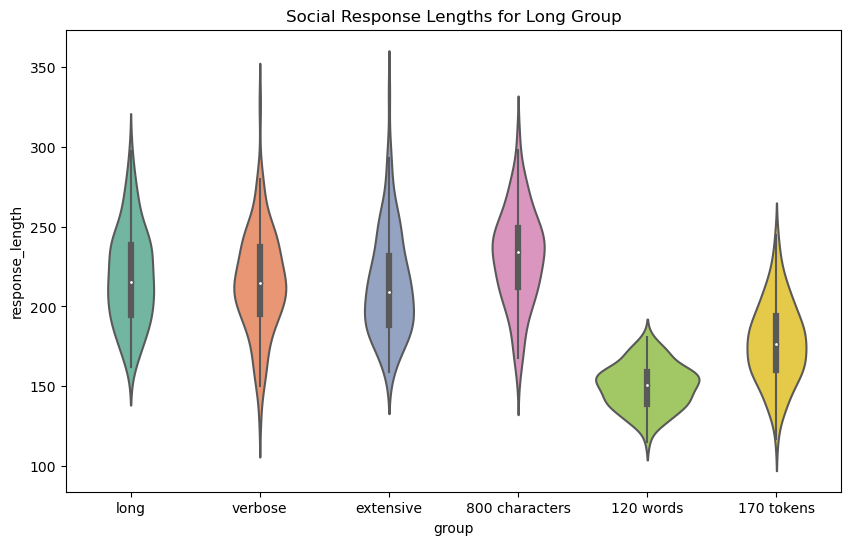

In [28]:
plot_violin(
    "words",
    "social",
    [
        "long",
        "verbose",
        "extensive",
        "800 characters long",
        "120 words long",
        "170 tokens long",
    ],
)

### Conclusion from violin plots:
- template-specific keywords for the short group produced shorter results than the constant keywords (I should have chosen a value lower than 25th percentile from the control group distribution)
- template-specific keywords on average produced longer responses than they asked for (e.g. when asking for 190 words, the outputs were on average around 200 words, for tokens and characters the difference was more visible)
- template-specific keywords which used characters to describe length produced the longest responses (and a lot longer than they asked for)
- template-specific keywords which used tokens to describe length produced the varying responses (usually longer than keywords which used words to describe length, sometimes very similar)

# Normality check

In [29]:
# check for normality for each column
# if p < 0.05, not normally distributed + add to list
not_normal = []
for col in df.columns:
    stat, p = shapiro(df[col])
    if p < 0.05:
        not_normal.append(col)

print("COLUMNS NOT NORMALLY DISTRIBUTED:\n", not_normal)
print("NUMBER OF COLUMNS NOT NORMALLY DISTRIBUTED:\n", len(not_normal))

COLUMNS NOT NORMALLY DISTRIBUTED:
 ['cover_1300 characters long', 'cover_210 words long', 'cover_average-length', 'cover_concise', 'cover_short', 'email_short', 'essay_400 tokens long', 'essay_430 tokens long', 'essay_moderate-length', 'essay_short', 'essay_verbose', 'explanation_1300 characters long', 'explanation_220 words long', 'explanation_240 words long', 'explanation_260 tokens long', 'explanation_300 tokens long', 'explanation_brief', 'explanation_concise', 'explanation_extensive', 'explanation_long', 'explanation_medium-length', 'explanation_moderate-length', 'explanation_short', 'explanation_verbose', 'social_brief', 'social_concise', 'social_extensive', 'social_short']
NUMBER OF COLUMNS NOT NORMALLY DISTRIBUTED:
 28


28 columns from 90 are not normally distributed so we cannot use Bartlett's Test for equality of varience, lets use Levene's Test instead...

# Levene's test + Bonferroni correction

We will use Levene's test to check if variences are unequal between groups. We will follow up this test with the pairwise Levene's test with the Bonferroni correction to counteract the problem of increasing type I errors.

Template: **email** <br>
Length group: **short**

In [30]:
# double checking if columns are normally distributed,
# some of them are not, so we will perform Levene's test
print("email_brief" in not_normal)
print("email_concise" in not_normal)
print("email_short" in not_normal)
print("email_1000 characters long" in not_normal)
print("email_170 words long" in not_normal)
print("email_200 tokens long" in not_normal)

False
False
True
False
False
False


We got unequal variences

In [50]:
group1 = df["email_brief"]
group2 = df["email_concise"]
group3 = df["email_short"]
group4 = df["email_1000 characters long"]
group5 = df["email_170 words long"]
group6 = df["email_200 tokens long"]

statistic, p_value = levene(group1, group2, group3, group4, group5, group6)

print(f"Statistic: {statistic}, p-value: {p_value}")

if p_value > 0.05:
    print("Equal variances")
else:
    print("Unequal variances")


### EFFECT SIZE ###
# Calculate degrees of freedom
df_between = len([group1, group2, group3, group4, group5, group6]) - 1
df_within = len(group1) + len(group2) + len(group3) + len(group4) + len(group5) + len(group6) - len([group1, group2, group3, group4, group5, group6])

# Calculate omega-squared - effect size
omega_squared = (statistic - 1) / (statistic + (df_within / df_between) - 1)

print(f"Omega-squared: {omega_squared:.3f}")

# Interpret the effect size
variance_explained = omega_squared * 100
print(f"{variance_explained:.2f}% of variability in response lengths is explained by length defining keyword used in prompt.")

Statistic: 7.5635732150148725, p-value: 6.707052850973348e-07
Unequal variances
Omega-squared: 0.052
5.24% of variability in response lengths is explained by length defining keyword used in prompt.


In [51]:
group1 = df["email_brief"]
group2 = df["email_concise"]
group3 = df["email_short"]
group4 = df["email_1000 characters long"]
group5 = df["email_170 words long"]
group6 = df["email_200 tokens long"]

groups = [group1, group2, group3, group4, group5, group6]
group_names = [
    "BRIEF",
    "CONCISE",
    "SHORT",
    "1000 CHARACTERS LONG",
    "170 WORDS LONG",
    "200 TOKENS LONG",
]

# number of groups
num_groups = len(groups)

# number of pairwise comparisons
num_comparisons = int((num_groups * (num_groups - 1)) / 2)

# Bonferroni corrected significance level
alpha_bonferroni = 0.05 / num_comparisons

# pair-wise Levene's tests
for i, j in itertools.combinations(range(num_groups), 2):
    statistic, p_value = levene(groups[i], groups[j])

    if p_value < alpha_bonferroni:
        print(
            f"Variances for {group_names[i]} and {group_names[j]} are significantly different. p-value: {p_value}"
        )

        ### EFFECT SIZE ###
        # Calculate the degrees of freedom
        df_between = 1
        df_within = len(groups[i]) + len(groups[j]) - 2

        # Calculate omega-squared
        omega_squared = (statistic - 1) / (statistic + (df_within / df_between) - 1)

        # Interpret the effect size
        variance_explained = omega_squared * 100
        print(f"Omega-squared: {omega_squared:.4f} ({variance_explained:.2f}% of the variability explained)\n")

Variances for BRIEF and 170 WORDS LONG are significantly different. p-value: 3.188827034107637e-07
Omega-squared: 0.1200 (12.00% of the variability explained)

Variances for CONCISE and 170 WORDS LONG are significantly different. p-value: 5.207855685213614e-05
Omega-squared: 0.0752 (7.52% of the variability explained)

Variances for SHORT and 170 WORDS LONG are significantly different. p-value: 2.9631012311126515e-05
Omega-squared: 0.0803 (8.03% of the variability explained)

Variances for 1000 CHARACTERS LONG and 170 WORDS LONG are significantly different. p-value: 9.013578557549025e-09
Omega-squared: 0.1504 (15.04% of the variability explained)

Variances for 170 WORDS LONG and 200 TOKENS LONG are significantly different. p-value: 1.668989241431699e-07
Omega-squared: 0.1256 (12.56% of the variability explained)



Template: **email** <br>
Length group: **medium**

In [52]:
group1 = df["email_medium-length"]
group2 = df["email_average-length"]
group3 = df["email_moderate-length"]
group4 = df["email_1100 characters long"]
group5 = df["email_190 words long"]
group6 = df["email_220 tokens long"]

statistic, p_value = levene(group1, group2, group3, group4, group5, group6)

print(f"Statistic: {statistic}, p-value: {p_value}")

if p_value > 0.05:
    print("Equal variances")
else:
    print("Unequal variances")

### EFFECT SIZE ###
# Calculate degrees of freedom
df_between = len([group1, group2, group3, group4, group5, group6]) - 1
df_within = len(group1) + len(group2) + len(group3) + len(group4) + len(group5) + len(group6) - len([group1, group2, group3, group4, group5, group6])

# Calculate omega-squared - effect size
omega_squared = (statistic - 1) / (statistic + (df_within / df_between) - 1)

print(f"Omega-squared: {omega_squared:.3f}")

# Interpret the effect size
variance_explained = omega_squared * 100
print(f"{variance_explained:.2f}% of variability in response lengths is explained by length defining keyword used in prompt.")

Statistic: 17.344731224927205, p-value: 4.820615510893485e-16
Unequal variances
Omega-squared: 0.121
12.09% of variability in response lengths is explained by length defining keyword used in prompt.


In [53]:
group1 = df["email_medium-length"]
group2 = df["email_average-length"]
group3 = df["email_moderate-length"]
group4 = df["email_1100 characters long"]
group5 = df["email_190 words long"]
group6 = df["email_220 tokens long"]

groups = [group1, group2, group3, group4, group5, group6]
group_names = [
    "MEDIUM-LENGTH",
    "AVERAGE-LENGTH",
    "MODERATE-LENGTH",
    "1100 CHARACTERS LONG",
    "190 WORDS LONG",
    "220 TOKENS LONG",
]

# number of groups
num_groups = len(groups)

# number of pairwise comparisons
num_comparisons = int((num_groups * (num_groups - 1)) / 2)

# Bonferroni corrected significance level
alpha_bonferroni = 0.05 / num_comparisons

# pair-wise Levene's tests
for i, j in itertools.combinations(range(num_groups), 2):
    statistic, p_value = levene(groups[i], groups[j])

    if p_value < alpha_bonferroni:
        print(
            f"Variances for {group_names[i]} and {group_names[j]} are significantly different. p-value: {p_value}"
        )

        ### EFFECT SIZE ###
        # Calculate the degrees of freedom
        df_between = 1
        df_within = len(groups[i]) + len(groups[j]) - 2

        # Calculate omega-squared
        omega_squared = (statistic - 1) / (statistic + (df_within / df_between) - 1)

        # Interpret the effect size
        variance_explained = omega_squared * 100
        print(f"Omega-squared: {omega_squared:.4f} ({variance_explained:.2f}% of the variability explained)\n")

Variances for MEDIUM-LENGTH and 190 WORDS LONG are significantly different. p-value: 8.135737690372824e-14
Omega-squared: 0.2431 (24.31% of the variability explained)

Variances for MEDIUM-LENGTH and 220 TOKENS LONG are significantly different. p-value: 9.091452122957382e-07
Omega-squared: 0.1109 (11.09% of the variability explained)

Variances for AVERAGE-LENGTH and 190 WORDS LONG are significantly different. p-value: 1.1854200211584705e-12
Omega-squared: 0.2226 (22.26% of the variability explained)

Variances for AVERAGE-LENGTH and 220 TOKENS LONG are significantly different. p-value: 2.4832467938960433e-05
Omega-squared: 0.0818 (8.18% of the variability explained)

Variances for MODERATE-LENGTH and 190 WORDS LONG are significantly different. p-value: 2.7990565511709036e-13
Omega-squared: 0.2337 (23.37% of the variability explained)

Variances for MODERATE-LENGTH and 220 TOKENS LONG are significantly different. p-value: 4.513332336948059e-06
Omega-squared: 0.0969 (9.69% of the variab

Template: **email** <br>
Length group: **long**

In [54]:
group1 = df["email_long"]
group2 = df["email_verbose"]
group3 = df["email_extensive"]
group4 = df["email_1300 characters long"]
group5 = df["email_220 words long"]
group6 = df["email_260 tokens long"]

statistic, p_value = levene(group1, group2, group3, group4, group5, group6)

print(f"Statistic: {statistic}, p-value: {p_value}")

if p_value > 0.05:
    print("Equal variances")
else:
    print("Unequal variances")


### EFFECT SIZE ###
# Calculate degrees of freedom
df_between = len([group1, group2, group3, group4, group5, group6]) - 1
df_within = len(group1) + len(group2) + len(group3) + len(group4) + len(group5) + len(group6) - len([group1, group2, group3, group4, group5, group6])

# Calculate omega-squared - effect size
omega_squared = (statistic - 1) / (statistic + (df_within / df_between) - 1)

print(f"Omega-squared: {omega_squared:.3f}")

# Interpret the effect size
variance_explained = omega_squared * 100
print(f"{variance_explained:.2f}% of variability in response lengths is explained by length defining keyword used in prompt.")

Statistic: 10.795164127622881, p-value: 5.951573510238681e-10
Unequal variances
Omega-squared: 0.076
7.62% of variability in response lengths is explained by length defining keyword used in prompt.


In [55]:
group1 = df["email_long"]
group2 = df["email_verbose"]
group3 = df["email_extensive"]
group4 = df["email_1300 characters long"]
group5 = df["email_220 words long"]
group6 = df["email_260 tokens long"]

groups = [group1, group2, group3, group4, group5, group6]
group_names = [
    "LONG",
    "VERBOSE",
    "EXTENSIVE",
    "1300 CHARACTERS LONG",
    "220 WORDS LONG",
    "260 TOKENS LONG",
]

# number of groups
num_groups = len(groups)

# number of pairwise comparisons
num_comparisons = int((num_groups * (num_groups - 1)) / 2)

# Bonferroni corrected significance level
alpha_bonferroni = 0.05 / num_comparisons

# pair-wise Levene's tests
for i, j in itertools.combinations(range(num_groups), 2):
    statistic, p_value = levene(groups[i], groups[j])

    if p_value < alpha_bonferroni:
        print(
            f"Variances for {group_names[i]} and {group_names[j]} are significantly different. p-value: {p_value}"
        )

        ### EFFECT SIZE ###
        # Calculate the degrees of freedom
        df_between = 1
        df_within = len(groups[i]) + len(groups[j]) - 2

        # Calculate omega-squared
        omega_squared = (statistic - 1) / (statistic + (df_within / df_between) - 1)

        # Interpret the effect size
        variance_explained = omega_squared * 100
        print(f"Omega-squared: {omega_squared:.4f} ({variance_explained:.2f}% of the variability explained)\n")

Variances for LONG and 220 WORDS LONG are significantly different. p-value: 1.5938624990169514e-10
Omega-squared: 0.1837 (18.37% of the variability explained)

Variances for LONG and 260 TOKENS LONG are significantly different. p-value: 8.718748043977167e-05
Omega-squared: 0.0706 (7.06% of the variability explained)

Variances for VERBOSE and 220 WORDS LONG are significantly different. p-value: 5.936753013460736e-06
Omega-squared: 0.0945 (9.45% of the variability explained)

Variances for EXTENSIVE and 220 WORDS LONG are significantly different. p-value: 3.0961332739229434e-09
Omega-squared: 0.1594 (15.94% of the variability explained)

Variances for EXTENSIVE and 260 TOKENS LONG are significantly different. p-value: 0.000238375989226726
Omega-squared: 0.0617 (6.17% of the variability explained)

Variances for 1300 CHARACTERS LONG and 220 WORDS LONG are significantly different. p-value: 2.183225878836108e-09
Omega-squared: 0.1623 (16.23% of the variability explained)

Variances for 130

The results are similar to the observation of violin plots. The distributions where words are used to define the response length are the most different then the other groups.

# One-Way ANOVA

This type of ANOVA is used when you have one categorical independent variable (in this case a pair of teplate with a keyword) and a continuous dependent variable. It compares the means across the different levels of the independent variable.

**Assumptions to perform ANOVA**
- Independence: **MET** (each observation was collected individually and independently)
- Normality: **NOT MET** (dependent variable doesn't follow a normal distribution in 33 out of 90 columns/groups)
- Homogeneity of Variance: **NOT MET** (Levene's test showed unequal variances)
- Interval or Ratio Data: **MET** (it can be considered as ratio scale, ratios between text lengths are meaningful, as a text length of 200 characters is twice as long as a text length of 100 characters, there is a meaningful zero which represents the absence of characters or words)

# Kruskal-Wallis test + Dunn's Post Hoc test

**Kruskal-Wallis test** is a non-parametric equivalent of the One-Way ANOVA that does not assume normality or equal variances.

**Dunn's test** is a post hoc test used to compare all possible pairs of groups after finding a significant difference in the Kruskal-Wallis test. It is a non-parametric test that does not assume any specific distribution of the data. Its outcome is represented by a matrix that provides p-values indicating the significance of differences between groups. If the calculated p-value is less than 0.05, it indicates that the groups are significantly unequal.

In [48]:
# templates = ['email', 'essay', 'explanation', 'cover', 'social']
# length_descriptors = ['brief', 'concise', 'short',
#                       'medium-length', 'average-length', 'moderate-length',
#                       'long', 'verbose', 'extensive']

### Constant length-defining keywords

11/15 tests said there **ARE** significant differences between groups using constant length-defining keywords

In [58]:
def kruskal_wallis_3_groups(group1, group2, group3):
    """Performs a Kruskal-Wallis test on three groups with post hoc analysis using Dunn's test."""
    groups = [group1, group2, group3]

    statistic, p_value = kruskal(*groups)

    print("Kruskal-Wallis Test")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # calculate the effect size (eta squared)
    N = len(group1) + len(group2) + len(group3)  # total sample size
    k = len(groups)  # number of groups
    eta_squared = (statistic - k + 1) / (N - k)
    print(f"Effect size (η²): {eta_squared}")

    if p_value < 0.05:
        print("There ARE significant differences between the groups.")
        posthoc = posthoc_dunn(groups, p_adjust="bonferroni")
        print("\nDunn's Test (post hoc)")
        print(posthoc)
    else:
        print("There is NO significant difference between the groups.")

In [59]:
kruskal_wallis_3_groups(df["email_brief"], df["email_concise"], df["email_short"])

Kruskal-Wallis Test
Statistic: 2.396386405243819
P-value: 0.30173890074758203
Effect size (η²): 0.0013346343610903
There is NO significant difference between the groups.


In [60]:
kruskal_wallis_3_groups(
    df["email_average-length"], df["email_medium-length"], df["email_moderate-length"]
)

Kruskal-Wallis Test
Statistic: 8.248158465763856
P-value: 0.016178384256402285
Effect size (η²): 0.021037570591797495
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2         3
1  1.000000  0.021504  0.079632
2  0.021504  1.000000  1.000000
3  0.079632  1.000000  1.000000


In [61]:
kruskal_wallis_3_groups(df["email_long"], df["email_verbose"], df["email_extensive"])

Kruskal-Wallis Test
Statistic: 9.776817221761604
P-value: 0.007533401514008942
Effect size (η²): 0.02618456977024109
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2         3
1  1.000000  0.017697  0.023442
2  0.017697  1.000000  1.000000
3  0.023442  1.000000  1.000000


In [62]:
kruskal_wallis_3_groups(df["essay_brief"], df["essay_concise"], df["essay_short"])

Kruskal-Wallis Test
Statistic: 15.1541888101055
P-value: 0.0005120468644151392
Effect size (η²): 0.04429019801382324
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2       3
1  1.000000  0.000716  1.0000
2  0.000716  1.000000  0.0095
3  1.000000  0.009500  1.0000


In [63]:
kruskal_wallis_3_groups(
    df["essay_average-length"], df["essay_medium-length"], df["essay_moderate-length"]
)

Kruskal-Wallis Test
Statistic: 7.339864904900123
P-value: 0.025478190877928686
Effect size (η²): 0.01797934311414183
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2         3
1  1.000000  0.026855  1.000000
2  0.026855  1.000000  0.163124
3  1.000000  0.163124  1.000000


In [64]:
kruskal_wallis_3_groups(df["essay_long"], df["essay_verbose"], df["essay_extensive"])

Kruskal-Wallis Test
Statistic: 25.48462637749735
P-value: 2.924715962747319e-06
Effect size (η²): 0.07907281608584966
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2         3
1  1.000000  0.000012  0.000137
2  0.000012  1.000000  1.000000
3  0.000137  1.000000  1.000000


In [65]:
kruskal_wallis_3_groups(df["social_brief"], df["social_concise"], df["social_short"])

Kruskal-Wallis Test
Statistic: 59.556367011600315
P-value: 1.1681516381032769e-13
Effect size (η²): 0.1937924815205398
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  3.667184e-13  1.916594e-01
2  3.667184e-13  1.000000e+00  8.030390e-08
3  1.916594e-01  8.030390e-08  1.000000e+00


In [66]:
kruskal_wallis_3_groups(
    df["social_average-length"],
    df["social_medium-length"],
    df["social_moderate-length"],
)

Kruskal-Wallis Test
Statistic: 76.07286768267362
P-value: 3.0268205330446554e-17
Effect size (η²): 0.24940359489115696
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.936526e-12  1.060304e-14
2  1.936526e-12  1.000000e+00  1.000000e+00
3  1.060304e-14  1.000000e+00  1.000000e+00


In [67]:
kruskal_wallis_3_groups(df["social_long"], df["social_verbose"], df["social_extensive"])

Kruskal-Wallis Test
Statistic: 2.1710897106493645
P-value: 0.33771772845434017
Effect size (η²): 0.0005760596318160422
There is NO significant difference between the groups.


In [68]:
kruskal_wallis_3_groups(df["cover_brief"], df["cover_concise"], df["cover_short"])

Kruskal-Wallis Test
Statistic: 64.83805552980871
P-value: 8.329043552897337e-15
Effect size (η²): 0.2115759445448105
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  2.438632e-12  1.000000e+00
2  2.438632e-12  1.000000e+00  3.817528e-11
3  1.000000e+00  3.817528e-11  1.000000e+00


In [69]:
kruskal_wallis_3_groups(
    df["cover_average-length"], df["cover_medium-length"], df["cover_moderate-length"]
)

Kruskal-Wallis Test
Statistic: 4.819300310421952
P-value: 0.08984672148197816
Effect size (η²): 0.009492593637784352
There is NO significant difference between the groups.


In [70]:
kruskal_wallis_3_groups(df["cover_long"], df["cover_verbose"], df["cover_extensive"])

Kruskal-Wallis Test
Statistic: 52.937394117818435
P-value: 3.1973554844146214e-12
Effect size (η²): 0.17150637750107217
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1         2             3
1  1.000000e+00  0.000006  2.712051e-12
2  5.682046e-06  1.000000  5.194269e-02
3  2.712051e-12  0.051943  1.000000e+00


In [71]:
kruskal_wallis_3_groups(
    df["explanation_brief"], df["explanation_concise"], df["explanation_short"]
)

Kruskal-Wallis Test
Statistic: 13.535595539970764
P-value: 0.001150224923607894
Effect size (η²): 0.03884038902347058
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2         3
1  1.000000  0.000803  0.072122
2  0.000803  1.000000  0.495147
3  0.072122  0.495147  1.000000


In [72]:
kruskal_wallis_3_groups(
    df["explanation_average-length"],
    df["explanation_medium-length"],
    df["explanation_moderate-length"],
)

Kruskal-Wallis Test
Statistic: 22.023981743361734
P-value: 1.650262874809969e-05
Effect size (η²): 0.06742081395071291
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2         3
1  1.000000  0.044282  0.000008
2  0.044282  1.000000  0.072671
3  0.000008  0.072671  1.000000


In [73]:
kruskal_wallis_3_groups(
    df["explanation_long"], df["explanation_verbose"], df["explanation_extensive"]
)

Kruskal-Wallis Test
Statistic: 9.239780781263343
P-value: 0.009853876079128753
Effect size (η²): 0.024376366266879945
There ARE significant differences between the groups.

Dunn's Test (post hoc)
          1         2         3
1  1.000000  0.050201  1.000000
2  0.050201  1.000000  0.014404
3  1.000000  0.014404  1.000000


### Template specific length-defining keywords

15/15 tests said there **ARE** significant differences between groups using template specific length-defining keywords

In [74]:
kruskal_wallis_3_groups(
    df["email_1000 characters long"],
    df["email_170 words long"],
    df["email_200 tokens long"],
)

Kruskal-Wallis Test
Statistic: 186.99938253377562
P-value: 2.4751414499142106e-41
Effect size (η²): 0.6228935438847664
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.415948e-41  1.328791e-15
2  1.415948e-41  1.000000e+00  1.414282e-07
3  1.328791e-15  1.414282e-07  1.000000e+00


In [75]:
kruskal_wallis_3_groups(
    df["email_1100 characters long"],
    df["email_190 words long"],
    df["email_220 tokens long"],
)

Kruskal-Wallis Test
Statistic: 210.8954450394089
P-value: 1.6019021358088492e-46
Effect size (η²): 0.7033516667993566
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.018475e-46  1.736240e-17
2  1.018475e-46  1.000000e+00  2.081296e-08
3  1.736240e-17  2.081296e-08  1.000000e+00


In [76]:
kruskal_wallis_3_groups(
    df["email_1300 characters long"],
    df["email_220 words long"],
    df["email_260 tokens long"],
)

Kruskal-Wallis Test
Statistic: 173.94577500847925
P-value: 1.6910438982832607e-38
Effect size (η²): 0.578942003395553
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.648004e-35  2.228030e-22
2  1.648004e-35  1.000000e+00  2.192731e-02
3  2.228030e-22  2.192731e-02  1.000000e+00


In [77]:
kruskal_wallis_3_groups(
    df["essay_2300 characters long"],
    df["essay_350 words long"],
    df["essay_400 tokens long"],
)

Kruskal-Wallis Test
Statistic: 170.0828260840578
P-value: 1.166765509597658e-37
Effect size (η²): 0.565935441360464
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.163413e-28  1.539658e-29
2  1.163413e-28  1.000000e+00  1.000000e+00
3  1.539658e-29  1.000000e+00  1.000000e+00


In [78]:
kruskal_wallis_3_groups(
    df["essay_2500 characters long"],
    df["essay_370 words long"],
    df["essay_430 tokens long"],
)

Kruskal-Wallis Test
Statistic: 166.27538543886996
P-value: 7.829946844988237e-37
Effect size (η²): 0.5531157758884511
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  2.723507e-24  4.283417e-32
2  2.723507e-24  1.000000e+00  3.230242e-01
3  4.283417e-32  3.230242e-01  1.000000e+00


In [79]:
kruskal_wallis_3_groups(
    df["essay_2700 characters long"],
    df["essay_400 words long"],
    df["essay_470 tokens long"],
)

Kruskal-Wallis Test
Statistic: 169.65255445615404
P-value: 1.4468245836656701e-37
Effect size (η²): 0.564486715340586
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.153076e-26  3.263249e-31
2  1.153076e-26  1.000000e+00  1.000000e+00
3  3.263249e-31  1.000000e+00  1.000000e+00


In [80]:
kruskal_wallis_3_groups(
    df["explanation_1100 characters long"],
    df["explanation_190 words long"],
    df["explanation_220 tokens long"],
)

Kruskal-Wallis Test
Statistic: 213.39487826874074
P-value: 4.590827248890907e-47
Effect size (η²): 0.711767266898117
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  2.317464e-20  1.481224e-06
2  2.317464e-20  1.000000e+00  1.740783e-46
3  1.481224e-06  1.740783e-46  1.000000e+00


In [81]:
kruskal_wallis_3_groups(
    df["explanation_1300 characters long"],
    df["explanation_220 words long"],
    df["explanation_260 tokens long"],
)

Kruskal-Wallis Test
Statistic: 192.14051926223337
P-value: 1.8932866264520568e-42
Effect size (η²): 0.6402037685597083
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  4.207500e-23  2.885806e-03
2  4.207500e-23  1.000000e+00  6.102833e-40
3  2.885806e-03  6.102833e-40  1.000000e+00


In [82]:
kruskal_wallis_3_groups(
    df["explanation_1500 characters long"],
    df["explanation_240 words long"],
    df["explanation_300 tokens long"],
)

Kruskal-Wallis Test
Statistic: 182.90469085694133
P-value: 1.9175691022537516e-40
Effect size (η²): 0.6091067032220246
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  2.092314e-31  1.000000e+00
2  2.092314e-31  1.000000e+00  5.241439e-31
3  1.000000e+00  5.241439e-31  1.000000e+00


In [83]:
kruskal_wallis_3_groups(
    df["cover_1300 characters long"],
    df["cover_210 words long"],
    df["cover_240 tokens long"],
)

Kruskal-Wallis Test
Statistic: 221.58051062833914
P-value: 7.663081922125571e-49
Effect size (η²): 0.7393283186139366
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  2.344541e-48  1.093034e-20
2  2.344541e-48  1.000000e+00  4.699831e-07
3  1.093034e-20  4.699831e-07  1.000000e+00


In [84]:
kruskal_wallis_3_groups(
    df["cover_1400 characters long"],
    df["cover_230 words long"],
    df["cover_260 tokens long"],
)

Kruskal-Wallis Test
Statistic: 183.54924162460142
P-value: 1.3892762213454245e-40
Effect size (η²): 0.6112769078269408
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  3.219822e-41  3.892467e-13
2  3.219822e-41  1.000000e+00  2.784874e-09
3  3.892467e-13  2.784874e-09  1.000000e+00


In [85]:
kruskal_wallis_3_groups(
    df["cover_1500 characters long"],
    df["cover_240 words long"],
    df["cover_280 tokens long"],
)

Kruskal-Wallis Test
Statistic: 194.94520493361802
P-value: 4.65786194112833e-43
Effect size (η²): 0.6496471546586465
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.344814e-41  3.430067e-21
2  1.344814e-41  1.000000e+00  1.682634e-04
3  3.430067e-21  1.682634e-04  1.000000e+00


In [86]:
kruskal_wallis_3_groups(
    df["social_600 characters long"],
    df["social_100 words long"],
    df["social_130 tokens long"],
)

Kruskal-Wallis Test
Statistic: 175.14947065414108
P-value: 9.263512530645859e-39
Effect size (η²): 0.5829948506873437
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  2.010691e-30  1.943060e-29
2  2.010691e-30  1.000000e+00  1.000000e+00
3  1.943060e-29  1.000000e+00  1.000000e+00


In [87]:
kruskal_wallis_3_groups(
    df["social_700 characters long"],
    df["social_110 words long"],
    df["social_150 tokens long"],
)

Kruskal-Wallis Test
Statistic: 214.5289820445123
P-value: 2.6038948633249334e-47
Effect size (η²): 0.715585798129671
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  4.588274e-48  9.159996e-12
2  4.588274e-48  1.000000e+00  5.317981e-14
3  9.159996e-12  5.317981e-14  1.000000e+00


In [88]:
kruskal_wallis_3_groups(
    df["social_800 characters long"],
    df["social_120 words long"],
    df["social_170 tokens long"],
)

Kruskal-Wallis Test
Statistic: 200.06291939576943
P-value: 3.604865258852659e-44
Effect size (η²): 0.6668785164840721
There ARE significant differences between the groups.

Dunn's Test (post hoc)
              1             2             3
1  1.000000e+00  1.271293e-44  1.696764e-15
2  1.271293e-44  1.000000e+00  6.076322e-09
3  1.696764e-15  6.076322e-09  1.000000e+00


# One-Sample T-test

One-Sample T-test and Wilcoxon Signed-Rank test are statistical tests used to determine whether there is a significant difference between the mean (or median) of a sample and a specified population value (e.g. number of words).

One-Sample T-test is a parametric test used when the variable of interest is continuous and assumed to follow a normal distribution. Shapiro-Wilk showed that normality is not met in our data, so let's try Wilcoxon Signed-Rank test, which is a nonparametric test that does not assume any specific distribution of the data.

# Wilcoxon Signed-Rank Test

We will check if there is a significant difference between the mean of pairings distributions and output length specified by the template-specific lenght-defining keywords. We will focus on number of words as a length-defining keyword, because from the violin plots we can see that it produces the most consistent results and the closest to the specified length.


### Function

In [132]:
def wilcoxon_test(data):
    import re

    def extract_numbers(string):
        numbers = re.findall(r"\d+", string)
        return int(numbers[0]) if numbers else None

    hypothesized_median = extract_numbers(data.name)

    # We create a Series full of the hypothesized median value, of the same length as the data
    hypothesized_series = pd.Series(hypothesized_median for _ in range(len(data)))

    # Perform the Wilcoxon Signed Rank Test
    stat, p = wilcoxon(data - hypothesized_series)

    # Print the results
    print("stat=%.3f, p=%.3f" % (stat, p))

    # Interpretation
    alpha = 0.05
    if p > alpha:
        print(
            "(fail to reject H0) Not enough evidence to say that difference between distribution mean and speficied length in number of words is statistically significant"
        )
    else:
        print(
            "(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant"
        )

### Implementation

14/15 tests said there **ARE** significant differences between distibution means and length specified in the number of words

In [133]:
wilcoxon_test(df["email_170 words long"])

stat=575.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [134]:
wilcoxon_test(df["email_190 words long"])

stat=1050.500, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [135]:
wilcoxon_test(df["email_220 words long"])

stat=2361.000, p=0.956
(fail to reject H0) Not enough evidence to say that difference between distribution mean and speficied length in number of words is statistically significant


In [136]:
wilcoxon_test(df["essay_350 words long"])

stat=0.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [137]:
wilcoxon_test(df["essay_370 words long"])

stat=0.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [138]:
wilcoxon_test(df["essay_400 words long"])

stat=1.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [139]:
wilcoxon_test(df["explanation_190 words long"])

stat=37.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [140]:
wilcoxon_test(df["explanation_220 words long"])

stat=191.500, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [141]:
wilcoxon_test(df["explanation_240 words long"])

stat=753.500, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [142]:
wilcoxon_test(df["cover_210 words long"])

stat=95.500, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [143]:
wilcoxon_test(df["cover_230 words long"])

stat=742.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [144]:
wilcoxon_test(df["cover_240 words long"])

stat=1647.500, p=0.003
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [145]:
wilcoxon_test(df["social_100 words long"])

stat=0.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [146]:
wilcoxon_test(df["social_110 words long"])

stat=7.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


In [147]:
wilcoxon_test(df["social_120 words long"])

stat=3.000, p=0.000
(reject H0) Difference between distribution mean and speficied length in number of words IS statistically significant


### Let's check how much different are the means of the distributions and the specified length in the number of words.

In [204]:
def average_difference(data):
    import re

    def extract_numbers(string):
        numbers = re.findall(r"\d+", string)
        return int(numbers[0]) if numbers else None

    hypothesized_median = extract_numbers(data.name)

    # We create a Series full of the hypothesized median value, of the same length as the data
    hypothesized_series = pd.Series(hypothesized_median for _ in range(len(data)))

    return (data - hypothesized_series).mean()

For **email** mean difference ranges from **0 to 13** words

In [205]:
average_difference(df["email_170 words long"])

12.61

In [206]:
average_difference(df["email_190 words long"])

7.49

In [207]:
average_difference(df["email_220 words long"])

0.17

For **essay** mean difference ranges from **78 to 83** words

In [208]:
average_difference(df["essay_350 words long"])

78.29

In [209]:
average_difference(df["essay_370 words long"])

82.8

In [210]:
average_difference(df["essay_400 words long"])

78.81

For **explanation** mean difference ranges from **13 to 28** words

In [211]:
average_difference(df["explanation_190 words long"])

28.41

In [212]:
average_difference(df["explanation_220 words long"])

25.12

In [213]:
average_difference(df["explanation_240 words long"])

13.22

For **cover** mean difference ranges from **6 to 21** words

In [214]:
average_difference(df["cover_210 words long"])

20.75

In [215]:
average_difference(df["cover_230 words long"])

10.86

In [216]:
average_difference(df["cover_240 words long"])

5.94

For **social** mean difference ranges from **29 to 45** words

In [217]:
average_difference(df["social_100 words long"])

45.26

In [218]:
average_difference(df["social_110 words long"])

28.78

In [219]:
average_difference(df["social_120 words long"])

30.25

### Let's check how does it look like with characters

In [220]:
df = pd.read_csv("data/preprocessed_experimental_group/responses_chars.csv")

For **email** mean difference ranges from **461 to 618** characters

In [221]:
average_difference(df["email_1000 characters long"])

609.29

In [222]:
average_difference(df["email_1100 characters long"])

618.01

In [224]:
average_difference(df["email_1300 characters long"])

460.97

For **essay** mean difference ranges from **1280 to 1540** characters

In [225]:
average_difference(df["essay_2300 characters long"])

1483.99

In [226]:
average_difference(df["essay_2500 characters long"])

1280.52

In [227]:
average_difference(df["essay_2700 characters long"])

1539.62

For **explanation** mean difference ranges from **758 to 835** characters

In [228]:
average_difference(df["explanation_1100 characters long"])

835.36

In [229]:
average_difference(df["explanation_1300 characters long"])

822.52

In [230]:
average_difference(df["explanation_1500 characters long"])

757.75

For **cover** mean difference ranges from **577 to 797** characters

In [231]:
average_difference(df["cover_1300 characters long"])

797.46

In [232]:
average_difference(df["cover_1400 characters long"])

576.62

In [233]:
average_difference(df["cover_1500 characters long"])

643.26

For **social** mean difference ranges from **639 to 716** characters

In [234]:
average_difference(df["social_600 characters long"])

715.86

In [235]:
average_difference(df["social_700 characters long"])

703.57

In [236]:
average_difference(df["social_800 characters long"])

638.89

### Now the same with tokens

In [237]:
df = pd.read_csv("data/preprocessed_experimental_group/responses_tokens.csv")

For **email** mean difference ranges from **9 to 46** tokens

In [238]:
average_difference(df["email_200 tokens long"])

45.56

In [239]:
average_difference(df["email_220 tokens long"])

37.04

In [240]:
average_difference(df["email_260 tokens long"])

8.97

For **essay** mean difference ranges from **67 to 88** tokens

In [241]:
average_difference(df["essay_400 tokens long"])

87.58

In [242]:
average_difference(df["essay_430 tokens long"])

76.36

In [243]:
average_difference(df["essay_470 tokens long"])

67.38

For **explanation** mean difference ranges from **147 to 233** tokens

In [244]:
average_difference(df["explanation_220 tokens long"])

232.99

In [245]:
average_difference(df["explanation_260 tokens long"])

227.67

In [246]:
average_difference(df["explanation_300 tokens long"])

147.09

For **cover** mean difference ranges from **24 to 52** tokens

In [247]:
average_difference(df["cover_240 tokens long"])

52.28

In [248]:
average_difference(df["cover_260 tokens long"])

46.57

In [249]:
average_difference(df["cover_280 tokens long"])

23.76

For **social** mean difference ranges from **60 to 76** tokens

In [250]:
average_difference(df["social_130 tokens long"])

59.82

In [251]:
average_difference(df["social_150 tokens long"])

75.76

In [252]:
average_difference(df["social_170 tokens long"])

58.88